In [1]:
%load_ext autoreload
%autoreload 2

In [31]:
from src.convlstm.dm import ConvLSTMDataModule

dm = ConvLSTMDataModule(batch_size=5)

dm.setup()

In [32]:
x, y = next(iter(dm.train_dataloader()))

x.shape, y.shape

(torch.Size([5, 10, 3, 500, 500]), torch.Size([5, 1, 2000, 2000]))

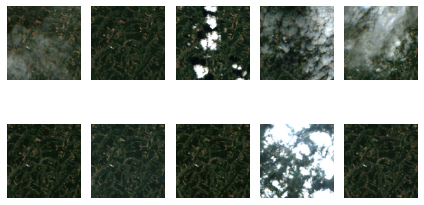

In [33]:
import matplotlib.pyplot as plt

fig = plt.figure()
ix = 1
imgs, mask = x[ix], y[ix]
for ix, img in enumerate(imgs):
    ax = plt.subplot(2, 5, ix + 1)
    ax.imshow(img.permute(1, 2, 0))
    ax.axis('off')
plt.tight_layout()
plt.show()

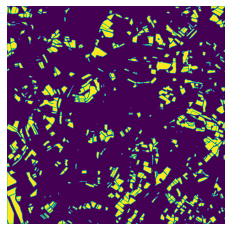

In [34]:
plt.imshow(mask[0])
plt.axis('off')
plt.show()

In [36]:
from src.convlstm.model import ConvLSTMModule

model = ConvLSTMModule({
    'hidden_dim': [64]
})

model

ConvLSTMModule(
  (convlstm): ConvLSTM(
    (cell_list): ModuleList(
      (0): ConvLSTMCell(
        (conv): Conv2d(67, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
  )
  (segmentation_head): Conv2d(64, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (metric): MatthewsCorrcoef()
)

In [37]:
output = model(x)

output.shape, output.dtype

(torch.Size([5, 1, 2000, 2000]), torch.float32)